In [1]:
import os
import pandas as pd
import geopandas as gpd
from dotenv import load_dotenv
from DataService import DataService
from matplotlib import pyplot as plt
from shapely import wkt

In [2]:
# The following lines adjust the granularity of reporting.
# pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
os.chdir("/tf")
PGUSER = os.getenv("POSTGRES_USER")
PGPW = os.getenv("POSTGRES_PW")
PGDB = os.getenv("POSTGRES_DB")
NULLFLAG = -9999

In [3]:
# Connect to the database
pullService = DataService(PGDB, PGUSER, PGPW)
db_pull_con = pullService.connect()

pushService = DataService(PGDB, PGUSER, PGPW)
db_push_con = pushService.connect()

In [4]:
# postgres syntax get all table names and place in list
sql = "SELECT table_name FROM information_schema.tables WHERE table_schema = 'public'"
tables = pd.read_sql_query(sql, db_pull_con)

In [5]:
# loop through tables and dump to csv
folder = "Data/"
for table in tables["table_name"]:
    print(table)
    sql = 'SELECT * FROM "{}"'.format(table)
    try:
        df = gpd.GeoDataFrame.from_postgis(sql, db_pull_con, geom_col="geom")
        filename = "GEO" + table + ".csv"
        df.to_csv(folder + filename, index=False)
    except:
        try:
            df = gpd.GeoDataFrame.from_postgis(sql, db_pull_con, geom_col="geometry")
            filename = "GEO" + table + ".csv"
            df.to_csv(folder + filename, index=False)
        except:
            df = pd.read_sql_query(sql, db_pull_con)
            filename = table + ".csv"
            df.to_csv(folder + filename, index=False)

geography_columns
geometry_columns
spatial_ref_sys
raster_columns
raster_overviews
ProvincialBoundaries
TenYrStationsHourly
WeatherDataHourlyAggMonthly
RandomTrain
RandomTest
RandomValidate
WeatherDataHourly
WeatherDataDaily
FirePreWeatherMerge
dbfNFDB_poin
FireWeather
WaterSources
SKContourWest
SKElevationPoints
AllFires
smallfireten
FireWeatherWaterElev
SKContourEast
WeatherDataHourlyAggDaily
FireWaterElev
dbfNFDB_poly
lgFireTen
lgFireTen2
lgFireTen3
lgFireTen4
lgFireTen5
lgFireFiftyCentroids
lgFireFifty
TenYrStationsDaily


In [8]:
# first read in the csv file into pd
dfTemp = pd.read_csv("Data/GEOProvincialBoundaries.csv")

# check if geom column exists rename to geometry
if "geom" in dfTemp.columns:
    dfTemp.rename(columns={"geom": "geometry"}, inplace=True)
# apply wkt to geometry column
dfTemp["geometry"] = dfTemp["geometry"].apply(wkt.loads)

dfProvinces = gpd.GeoDataFrame(dfTemp, geometry="geometry", crs="epsg:3978")

,provID,geometry
0,NL,"MULTIPOLYGON (((8307365.589 2582136.711, 83083..."
1,PE,"MULTIPOLYGON (((8435711.754 1679935.966, 84358..."
2,NS,"MULTIPOLYGON (((8470851.646 1624745.011, 84710..."
3,NB,"MULTIPOLYGON (((8176224.537 1722553.460, 81762..."
4,QC,"MULTIPOLYGON (((8399709.494 2261445.703, 84005..."
5,ON,"MULTIPOLYGON (((6378815.614 2295412.440, 63787..."
6,MB,"MULTIPOLYGON (((6039656.509 2636304.343, 60396..."
7,SK,"POLYGON ((5248633.914 2767057.263, 5249285.640..."
8,AB,"POLYGON ((5228304.177 2767597.891, 5228098.463..."
9,BC,"MULTIPOLYGON (((4018904.414 3410247.271, 40194..."


<AxesSubplot: >

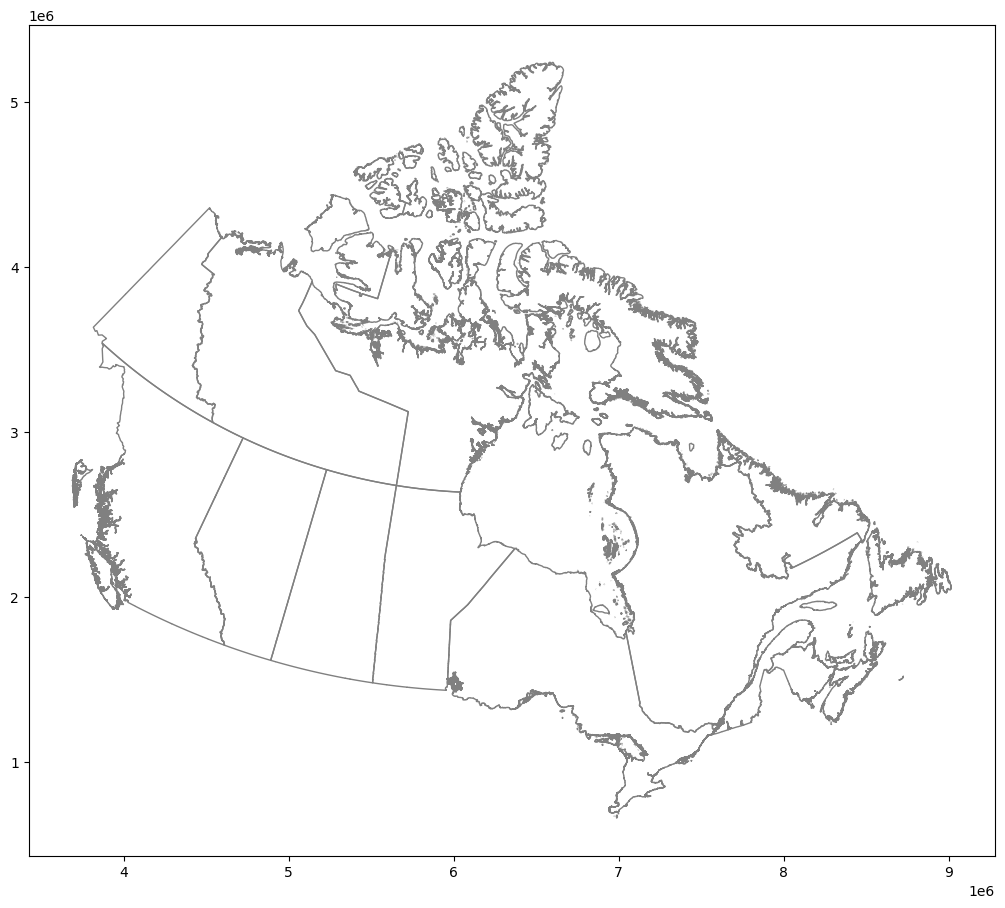

In [10]:
# plot
f, ax = plt.subplots(figsize=(19.20, 10.80))
dfProvinces.boundary.plot(ax=ax, color="gray", edgecolor="black", linewidth=1)